In [1]:
using Pkg
if Sys.KERNEL == :Linux
    environment = "../stoch_growth_model_server"
elseif Sys.KERNEL == :Darwin
    environment = "AAA - Honours Projec/stoch_growth_model_for_alice/"
end
    
Pkg.activate("$environment")

  Activating project at `~/stoch_growth_model_for_alice/stoch_growth_model_server`


In [ ]:
# Pkg.add(PackageSpec(name="Catalyst", version="15.0.4"))
# Pkg.add(PackageSpec(name="DifferentialEquations", version="7.16.1"))
# Pkg.add(PackageSpec(name="DataFrames", version="1.7.0"))
# Pkg.add(PackageSpec(name="CSV", version="0.10.15"))
# Pkg.add("Plots")


In [2]:
using Catalyst
using DifferentialEquations
using DataFrames
using CSV
using Plots

In [3]:
include("model_eqs_tutorial.jl")
include("model_div_tutorial.jl")
include("../src/setup_funcs.jl")
params = getPars("molecs", "PNAs"; abx=0.0)
u0 = getX0(gm_divC; ss=false, parametrization="PNAs")

18-element Vector{Pair{Num, Float64}}:
   a(t) => 10.0
  si(t) => 0.0
  mm(t) => 0.0
  mt(t) => 0.0
  mq(t) => 0.0
  mr(t) => 0.0
  cm(t) => 0.0
  ct(t) => 0.0
  cq(t) => 0.0
  cr(t) => 0.0
  em(t) => 0.0
  et(t) => 0.0
   q(t) => 0.0
   r(t) => 10.0
 zmm(t) => 0.0
 zmt(t) => 0.0
 zmq(t) => 0.0
 zmr(t) => 0.0

In [4]:
println("Solving ODE system")
# prob = ODEProblem(gm_divC, u0, (0.0, 1e3), params)
# sol = solve(prob, Rodas5(); saveat=1.0)

# prob = ODEProblem(gm_divC, u0, (1e-3, 1e9), params)
# sol = solve(prob, Rodas5(); saveat=10 .^ range(-3, 9; length=500))

tspan = (1e-3, 1e9)
save_times = 10 .^ range(-3, 9; length=500)
prob = ODEProblem(gm_divC, u0, tspan, params)
sol = solve(prob, Rodas5(); saveat=save_times)

println("Simulation complete")


Solving ODE system
Simulation complete


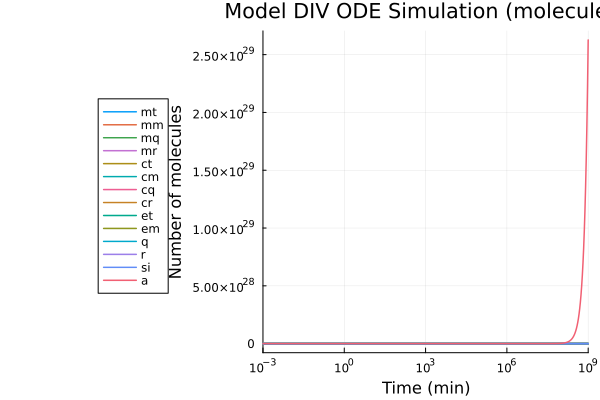

In [12]:
include("model_div_tutorial.jl")   # defines gm_divC

# Pick ONE parameterization & units. If you want molecule counts, do this:
params = getPars("molecs", "PNAs"; abx=0.0)
u0     = getX0(gm_divC; ss=false, parametrization="PNAs")

t      = 10 .^ range(-3, 9; length=500)
prob   = ODEProblem(gm_divC, u0, (t[1], t[end]), params)
sol    = solve(prob, Rodas5(); saveat=t)

# Plot ONLY the species you care about (no DataFrame, no implicit columns)
species_to_plot = [:mt,:mm,:mq,:mr,:ct,:cm,:cq,:cr,:et,:em,:q,:r,:si,:a]
plot(sol; idxs=species_to_plot, xscale=:log10, lw=1.5,
     xlabel="Time (min)", ylabel="Number of molecules",
     legend=:outerleft, title="Model DIV ODE Simulation (molecules)")

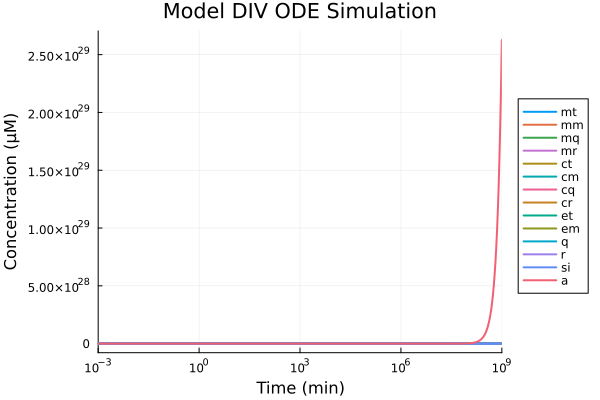

In [10]:

df = DataFrame(sol)
#CSV.write("model_div_results.csv", df)
μM_to_molecules = 1e-6 * 6.02214076e23 * 1e-15  # (μM) × Avogadro × cell volume (1 fL)

# plot(sol * μM_to_molecules; idxs=[:mt, :mm, :mq, :mr, :ct, :cm, :cq, :cr, :et, :em, :q, :r, :si, :a],
#      xscale=:log10, lw=1.5,
#      xlabel="Time (min)", ylabel="Number of molecules",
#      legend=:outerleft, title="Model DIV ODE Simulation (molecules)")
plt = plot(sol;
    idxs=[:mt, :mm, :mq, :mr, :ct, :cm, :cq, :cr, :et, :em, :q, :r, :si, :a],
    lw=2,
    xlabel="Time (min)",
    ylabel="Concentration (µM)",
    legend=:outerright,
    title="Model DIV ODE Simulation",
    xscale=:log10    # <-- this gives you the log time axis
)
display(plt)


In [12]:
# To save changes each time
# in a server terminal: 
# git add . 
# git commit -m "message"
# git push


# If working somewhere else do: git pull